<a href="https://colab.research.google.com/github/Sirikorn17/229352-StatisticalLearning/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [63]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [64]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

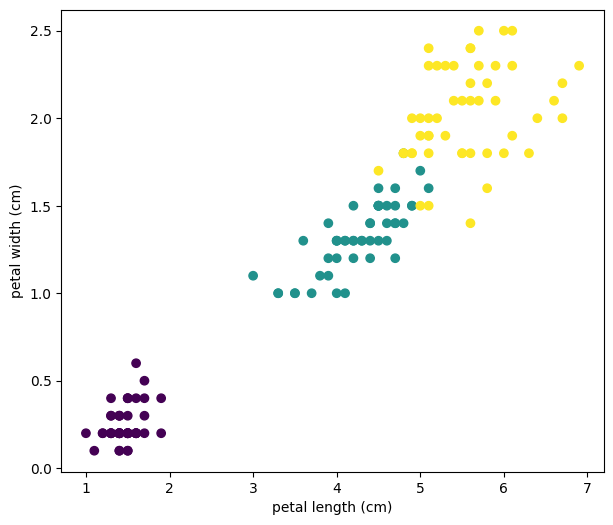

In [65]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y) # ตัวแปรต้นสองตัว
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [66]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [67]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

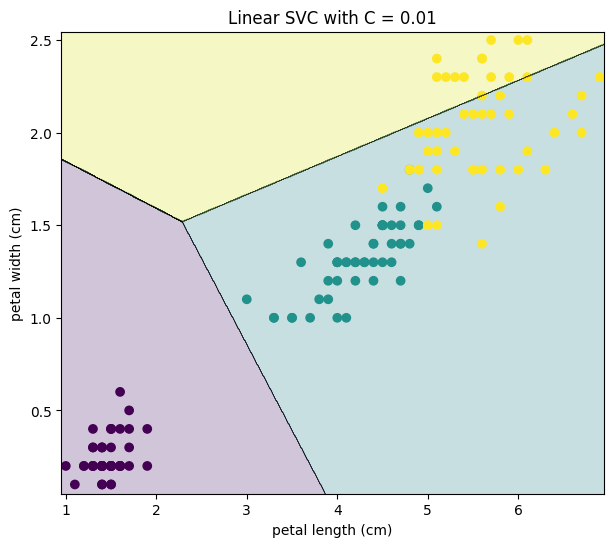

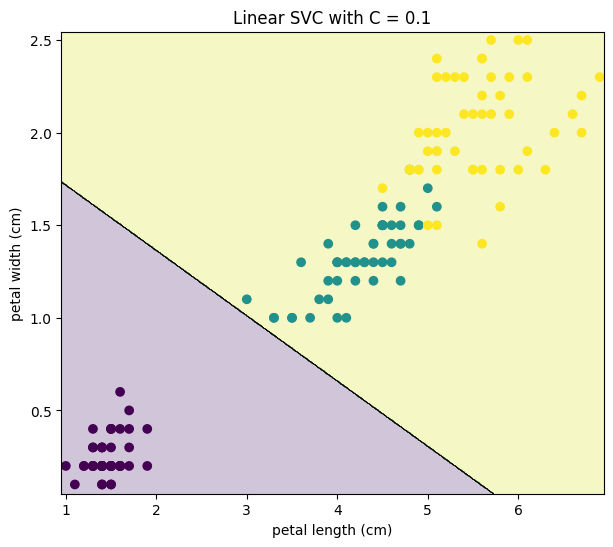

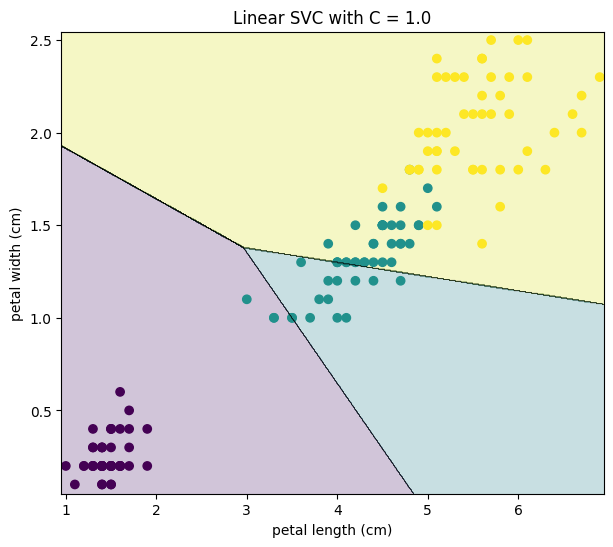

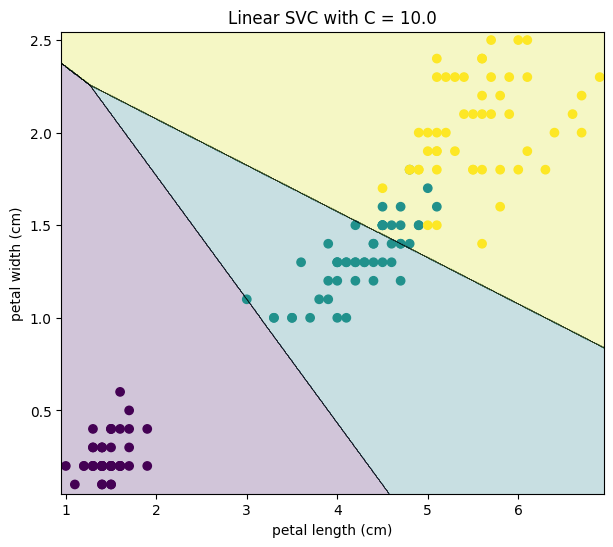

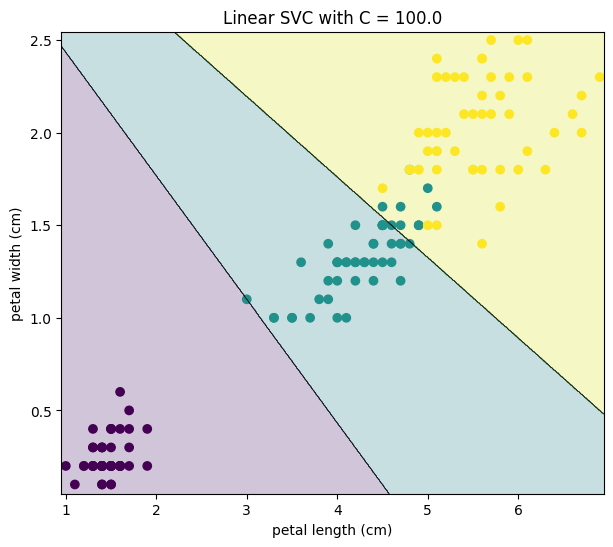

In [74]:
#TODO

C_values = [0.01, 0.1, 1.0, 10.0, 100.0] # กำหนดค่าของพารามิเตอร์ C

# วนลูปค่า C ตั้งแต่ 0.01, 0.1, 1.0, 10.0, และ 100.0 เพื่อฝึกโมเดล LinearSVC โดยใช้ loss='hinge'
for C in C_values:
    lsvc = LinearSVC(C=C, loss='hinge', max_iter=100000)
    lsvc.fit(X_train, y_train)
    plot_decision_boundary(lsvc, X, y)

    plt.title(f"Linear SVC with C = {C}")
    plt.show()

# c = 0.01
# lsvc = LinearSVC(C=0.01,loss='hinge', max_iter=100000)
# lsvc.fit(X_train, y_train)
# plot_decision_boundary(lsvc, X_train, y_train)

# c = 0.1
# lsvc = LinearSVC(C=0.1,loss='hinge', max_iter=100000)
# lsvc.fit(X_train, y_train)
# plot_decision_boundary(lsvc, X_train, y_train)




#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [70]:
#TODO

from sklearn.metrics import accuracy_score

### เลือก C = 100 ###
# เทรนโมเดลด้วย C = 100
lsvc = LinearSVC(C=100, loss='hinge', max_iter=100000)
lsvc.fit(X_train, y_train)

# ทำนายผลบนชุดทดสอบ
y_pred = lsvc.predict(X_test)

# คำนวณ accuracy และ test error
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

# print(f"Test Accuracy with C=100 : {accuracy:.4f}")
print(f"Test Error with C=100 : {test_error:.4f}")


Test Error with C=100 : 0.0333


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

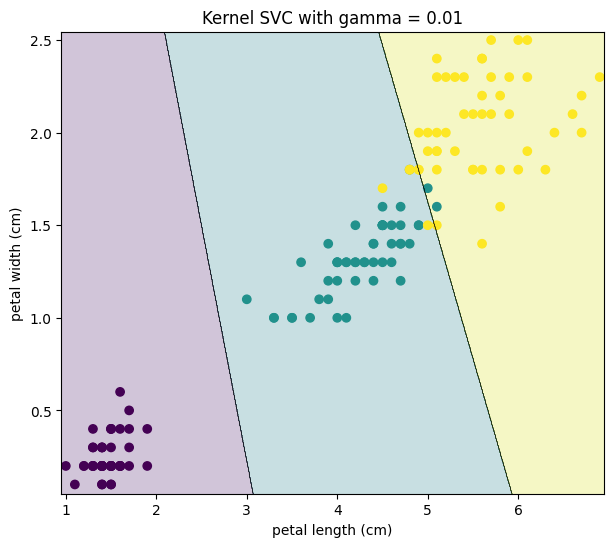

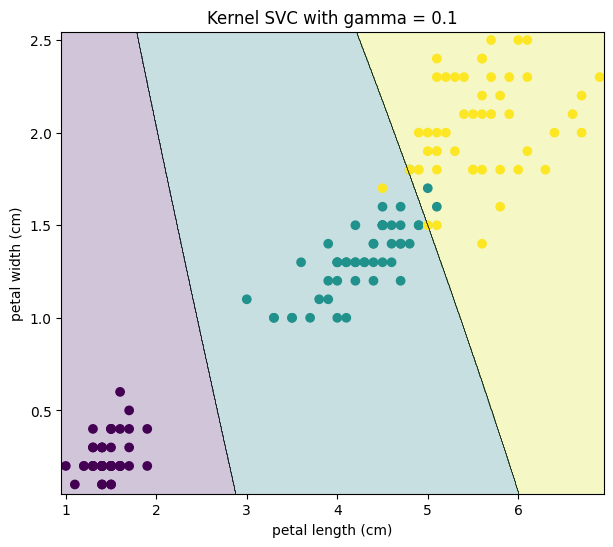

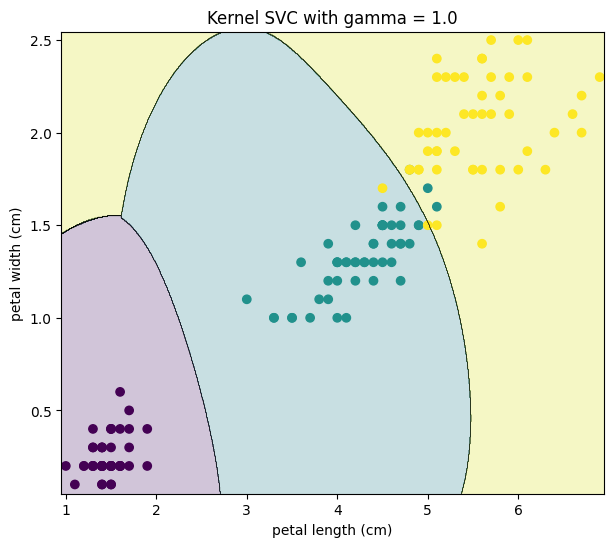

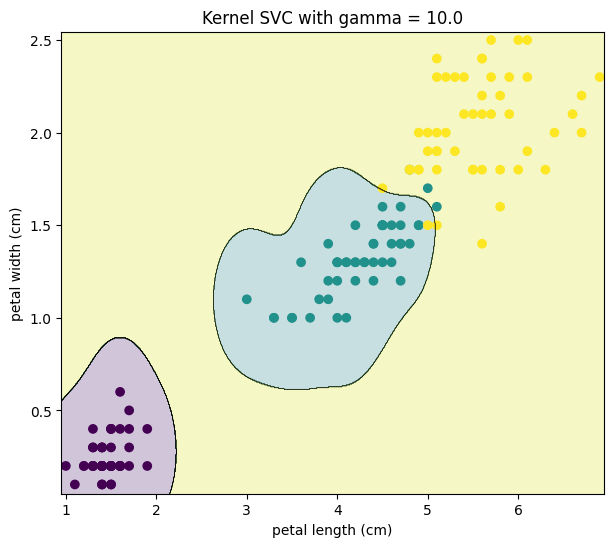

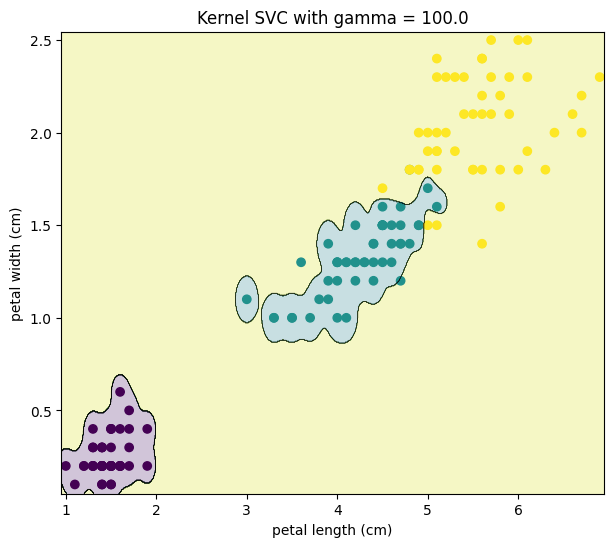

In [71]:
#TODO

gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0] # กำหนดค่าของ gamma

# วนลูปค่า gamma ตั้งแต่ 0.01, 0.1, 1.0, 10.0, และ 100.0
for g in gamma_values:
    svc = SVC(kernel='rbf', C=1.0, gamma=g, max_iter=100000)
    svc.fit(X_train, y_train)
    plot_decision_boundary(svc, X, y)

    plt.title(f"Kernel SVC with gamma = {g}")
    plt.show()


# gamma=0.01
# svc = SVC(kernel='rbf', C=1.0, gamma=0.01, max_iter=10000)
# svc.fit(X_train, y_train)
# plot_decision_boundary(svc, X_train, y_train)

# gamma=0.1
# svc = SVC(kernel='rbf', C=1.0, gamma=0.1, max_iter=10000)
# svc.fit(X_train, y_train)
# plot_decision_boundary(svc, X_train, y_train)


#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [72]:
#TODO

from sklearn.metrics import accuracy_score

### เลือก gamma = 100 ###
# เทรนโมเดลด้วย gamma = 100
svc = SVC(kernel='rbf', C=1.0, gamma=100, max_iter=10000)
svc.fit(X_train, y_train)

# ทำนายผลบนชุดทดสอบ
y_pred = svc.predict(X_test)

# คำนวณ accuracy และ test error
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

# print(f"Test Accuracy gamma=100 : {accuracy:.4f}")
print(f"Test Error with gamma=100 : {test_error:.4f}")

num_support_vectors = svc.support_vectors_.shape[0]
print(f"Number of support vectors: {num_support_vectors}")

Test Error with gamma=100 : 0.0667
Number of support vectors: 92


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [73]:
#TODO

1. Explain using test accuracy

จากผลการทดสอบ:
*   **Linear SVM (เมื่อ C=100):** ค่าความผิดพลาดในการทดสอบ (Test error) อยู่ที่ 0.0333 ซึ่งหมายถึงความแม่นยำในการทดสอบเท่ากับ 1 - 0.0333 = 0.9667
*   **Kernel SVM (เมื่อ gamma=100):** ค่าความผิดพลาดในการทดสอบ (Test error) อยู่ที่ 0.0667 ซึ่งหมายถึงความแม่นยำในการทดสอบเท่ากับ 1 - 0.0667 = 0.9333

เมื่อเปรียบเทียบแล้ว Linear SVM มีความแม่นยำสูงกว่า (96.67% > 93.33%)

2. Explaing using decision boundary plot

วิเคราะห์จาก Decision Boundary Plot
- **Linear SVM** ให้เส้นขอบเขตการจำแนก (decision boundary) ที่เรียบง่ายและแยกคลาสได้ชัดเจน ซึ่งช่วยให้โมเดลมีความสามารถในการทำนายข้อมูลใหม่ได้ดี (generalization สูง)

- **Kernel SVM** เมื่อใช้ค่า gamma สูงถึง 100 จะได้เส้นขอบเขตที่ซับซ้อนและโค้งไปตามจุดข้อมูลมากเกินไป ซึ่งเสี่ยงต่อการเกิด overfitting ทำให้ประสิทธิภาพบนข้อมูลทดสอบลดลง

สรุป:
ด้วยความแม่นยำที่สูงกว่าและเส้นขอบเขตการจำแนกที่เหมาะสมกว่า จึงควรเลือกใช้ Linear SVM สำหรับการจำแนกข้อมูล Iris ในกรณีนี้